Project 1 - IS362
_________________________

In [9]:
#Create a .CSV file that includes all the information from table
#Change structure as you like
#Created an .csv file called "project1data.csv"

#import libraries that are needed
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline


#Read information from file into pandas dataframe
airlines = pd.read_csv('project1data.csv')

CSV file has been included in GitHub Repo
Data has been formatted as follows, the city is the key:

In [10]:
print(airlines.head())
airlines.dtypes

            city  AlaskaOnTime  AlaskaDelay  AMWestOnTime  AMWestDelay
0    Los Angeles           497           62           694          117
1        Phoenix           221           12          4840          415
2      San Diego           212           20           383           65
3  San Francisco           503          102           320          129
4        Seattle          1841          305           201           61


city            object
AlaskaOnTime     int64
AlaskaDelay      int64
AMWestOnTime     int64
AMWestDelay      int64
dtype: object

In [11]:
#Task: Compare the arrival delays for the two airlines

#Finding the percentage of flight delays for each city by Airline:
#First: Calculate the total number of flights for each city by Airline
airlines['TotalAlaska'] = airlines['AlaskaOnTime'] + airlines['AlaskaDelay']
airlines['TotalAMWest'] = airlines['AMWestOnTime'] + airlines['AMWestDelay']

#Second: Calculate the percent of flights that are delayed for each  city by airline
airlines['PercentDelayAlaska'] = (airlines['AlaskaDelay'] / airlines['TotalAlaska']) * 100
airlines['PercentDelayAMWest'] = (airlines['AMWestDelay'] / airlines['TotalAMWest']) * 100
print("Here is the data after calculating the percentage of delays")
print(airlines)

Here is the data after calculating the percentage of delays
            city  AlaskaOnTime  AlaskaDelay  AMWestOnTime  AMWestDelay  \
0    Los Angeles           497           62           694          117   
1        Phoenix           221           12          4840          415   
2      San Diego           212           20           383           65   
3  San Francisco           503          102           320          129   
4        Seattle          1841          305           201           61   

   TotalAlaska  TotalAMWest  PercentDelayAlaska  PercentDelayAMWest  
0          559          811           11.091234           14.426634  
1          233         5255            5.150215            7.897241  
2          232          448            8.620690           14.508929  
3          605          449           16.859504           28.730512  
4         2146          262           14.212488           23.282443  


The Data
-------------------
To determine which airline has the greatest delay, the delay for each airline needs to be compared by each City for each Airline.
If we look at the data, for example AM West can say they had more on time flights than Alaska, since they had 4,840 where Alaska only had 221.
But if take a look at the total percentage of delays, we can see that AM West still has a higher precentage of delayed flights.
The percent of delay is calculated for each City of each airline and this data is stored in the Dataframe.

Graphing the Results
---------------------
A Side by Side bar chart is created to allow for easy comparison of each Airline for every City. Looking at the graph, the blue bars are always higher than the red bars. AM West is the blue bars, which leads us to conclude that Alaska is the airline with fewer delays for all of the cities.

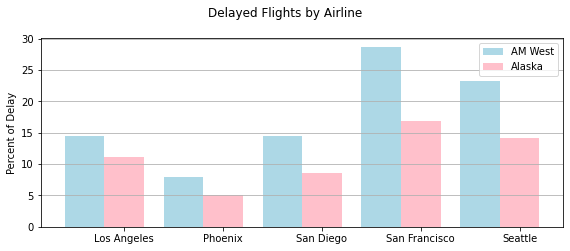

In [12]:
#Create the graph
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.4 # bar width
xlocs = np.arange(len(airlines['PercentDelayAMWest']))
ax.bar(xlocs-width, airlines['PercentDelayAMWest'], width,
 color='lightblue', label='AM West')
ax.bar(xlocs, airlines['PercentDelayAlaska'], width,
 color='pink', label='Alaska')
# --- labels, grids and title, then save
ax.set_xticks(ticks=range(len(airlines['PercentDelayAMWest'])))
ax.set_xticklabels(airlines['city'])
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Percent of Delay')
fig.suptitle('Delayed Flights by Airline')
fig.tight_layout(pad=1)